In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

from keras import models
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


In [4]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [5]:
# 훈련데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# 라벨 데이터를 카테고리 데이터로 전환
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 109ms/step - loss: 2.8438 - accuracy: 0.4724 - val_loss: 1.9459 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 2s 119ms/step - loss: 1.5885 - accuracy: 0.6770 - val_loss: 1.4171 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 1s 70ms/step - loss: 1.2046 - accuracy: 0.7384 - val_loss: 1.2200 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 0.9880 - accuracy: 0.7853 - val_loss: 1.0998 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 65ms/step - loss: 0.8260 - accuracy: 0.8183 - val_loss: 1.0304 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6877 - accuracy: 0.8498 - val_loss: 0.9747 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.5785 - accuracy: 0.8747 - val_loss: 0.9388 - val_accuracy: 0.8010
Epoch 8/20


In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

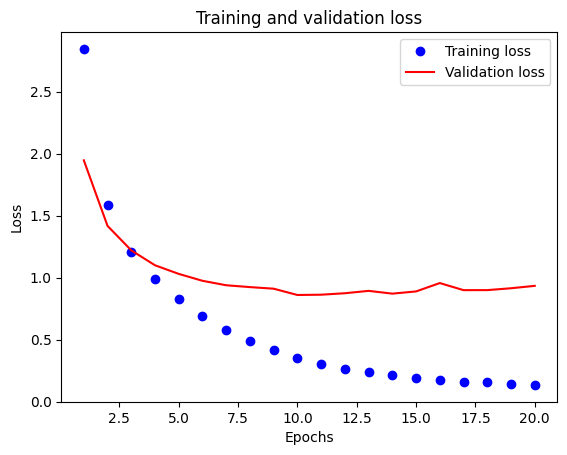

In [16]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

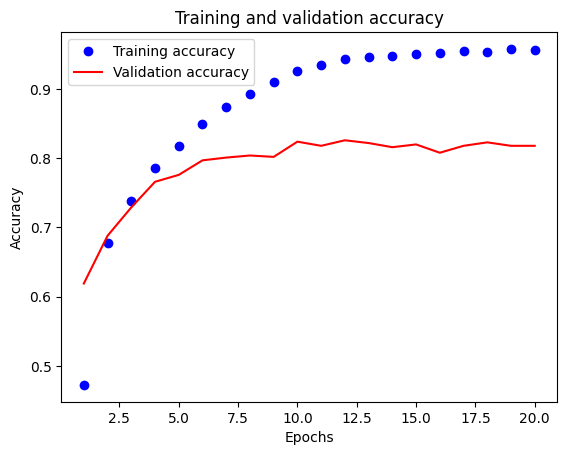

In [17]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
# 검증 된 결과로 다시 학습 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 78ms/step - loss: 2.6905 - accuracy: 0.5193 - val_loss: 1.8166 - val_accuracy: 0.6330
Epoch 2/10
16/16 [==============================] - 1s 61ms/step - loss: 1.5361 - accuracy: 0.6749 - val_loss: 1.3920 - val_accuracy: 0.6980
Epoch 3/10
16/16 [==============================] - 1s 59ms/step - loss: 1.1855 - accuracy: 0.7403 - val_loss: 1.2143 - val_accuracy: 0.7320
Epoch 4/10
16/16 [==============================] - 1s 61ms/step - loss: 0.9678 - accuracy: 0.7871 - val_loss: 1.0843 - val_accuracy: 0.7600
Epoch 5/10
16/16 [==============================] - 1s 59ms/step - loss: 0.8082 - accuracy: 0.8232 - val_loss: 1.0043 - val_accuracy: 0.7760
Epoch 6/10
16/16 [==============================] - 1s 60ms/step - loss: 0.6716 - accuracy: 0.8524 - val_loss: 0.9599 - val_accuracy: 0.7900
Epoch 7/10
16/16 [==============================] - 1s 60ms/step - loss: 0.5629 - accuracy: 0.8768 - val_loss: 0.9241 - val_accuracy: 0.7980
Epoch 8/10
16